<a href="https://colab.research.google.com/github/JuanCappelletti/Consteel_H06/blob/trends/ensayo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#@title Ejecutar librerias { run: "auto", display-mode: "form" }
from matplotlib.font_manager import json_dump
from numpy.matrixlib.defmatrix import N
from operator import truediv
import numpy as np
import pandas as pd
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
import matplotlib.pyplot as plt
import plotly.graph_objects as go


In [71]:
#@title CARGA DE DATA_SET 
Url = "https://raw.githubusercontent.com/JuanCappelletti/Consteel_H06/main/Trend1022.csv" #@param {type:"string"}
datos = pd.read_csv(Url,sep=";",decimal=",")
df=pd.DataFrame(datos)
dfx=df.copy()
dfx.Time= dfx.Date.values+' '+dfx.Time.values  #(dfx.loc[:,'Date']).replace('/','')
dfx

,indice,Date,Time,FQI161,PIR161,FQI165,FQI169,FQI177,FQI173,FQI151
0,1,1/10/2022,1/10/2022 0:00:00,4171.39,14.80,2568.86,0.00,11.50,45.89,1545.14
1,2,1/10/2022,1/10/2022 0:01:29,4466.73,14.63,2545.33,0.00,134.88,62.25,1724.27
2,3,1/10/2022,1/10/2022 0:02:59,4741.19,14.57,2546.29,0.00,173.25,164.33,1857.32
3,4,1/10/2022,1/10/2022 0:04:29,4391.12,14.34,2672.94,0.00,80.14,106.11,1531.93
4,5,1/10/2022,1/10/2022 0:05:59,6781.94,14.12,5317.06,0.00,152.17,68.00,1244.72
...,...,...,...,...,...,...,...,...,...,...
12475,12476,13/10/2022,13/10/2022 23:52:29,3879.33,15.22,1014.33,856.75,127.71,119.78,1760.77
12476,12477,13/10/2022,13/10/2022 23:53:59,3531.31,15.24,818.91,835.63,210.38,103.33,1563.06
12477,12478,13/10/2022,13/10/2022 23:55:29,3168.80,15.31,818.91,853.22,153.18,125.33,1218.16
12478,12479,13/10/2022,13/10/2022 23:56:59,2425.82,15.12,818.91,763.00,129.80,81.50,632.61


In [ ]:
#@title Analisis rapidos del data_set completo
a=np.array(round(df.FQI161.describe(),2))
b=np.array(round(df.PIR161.describe(),2))
c=np.array(round(df.FQI165.describe(),2))
d=np.array(round(df.FQI169.describe(),2))
e=np.array(round(df.FQI177.describe(),2))
f=np.array(round(df.FQI173.describe(),2))
g=np.array(round(df.FQI151.describe(),2))
h=np.array(["count","mean","std","min","25%","50%","75%","max"])
R=np.array(["Features","FQI161","PIR161","FQI165","FQI169","FQI177","FQI173","FQI151"])
ke=np.array([h,a,b,c,d,e,f,g])
dfD= pd.DataFrame(ke.T,columns=R)  

def TABLA1 (R):
 fig_A1 = go.Figure(data=[go.Table(
    header=dict(values=list(R.columns),
                fill_color='lightgray',
                align='left'),
    cells=dict(values=[R.Features,R.FQI161, R.PIR161,R.FQI165,R.FQI169,R.FQI177,R.FQI173,R.FQI151],
               fill_color='beige',
               align='left'))
  ])
 fig_A1.show()

print('Analisis rapidos.' )


TABLA1(dfD)

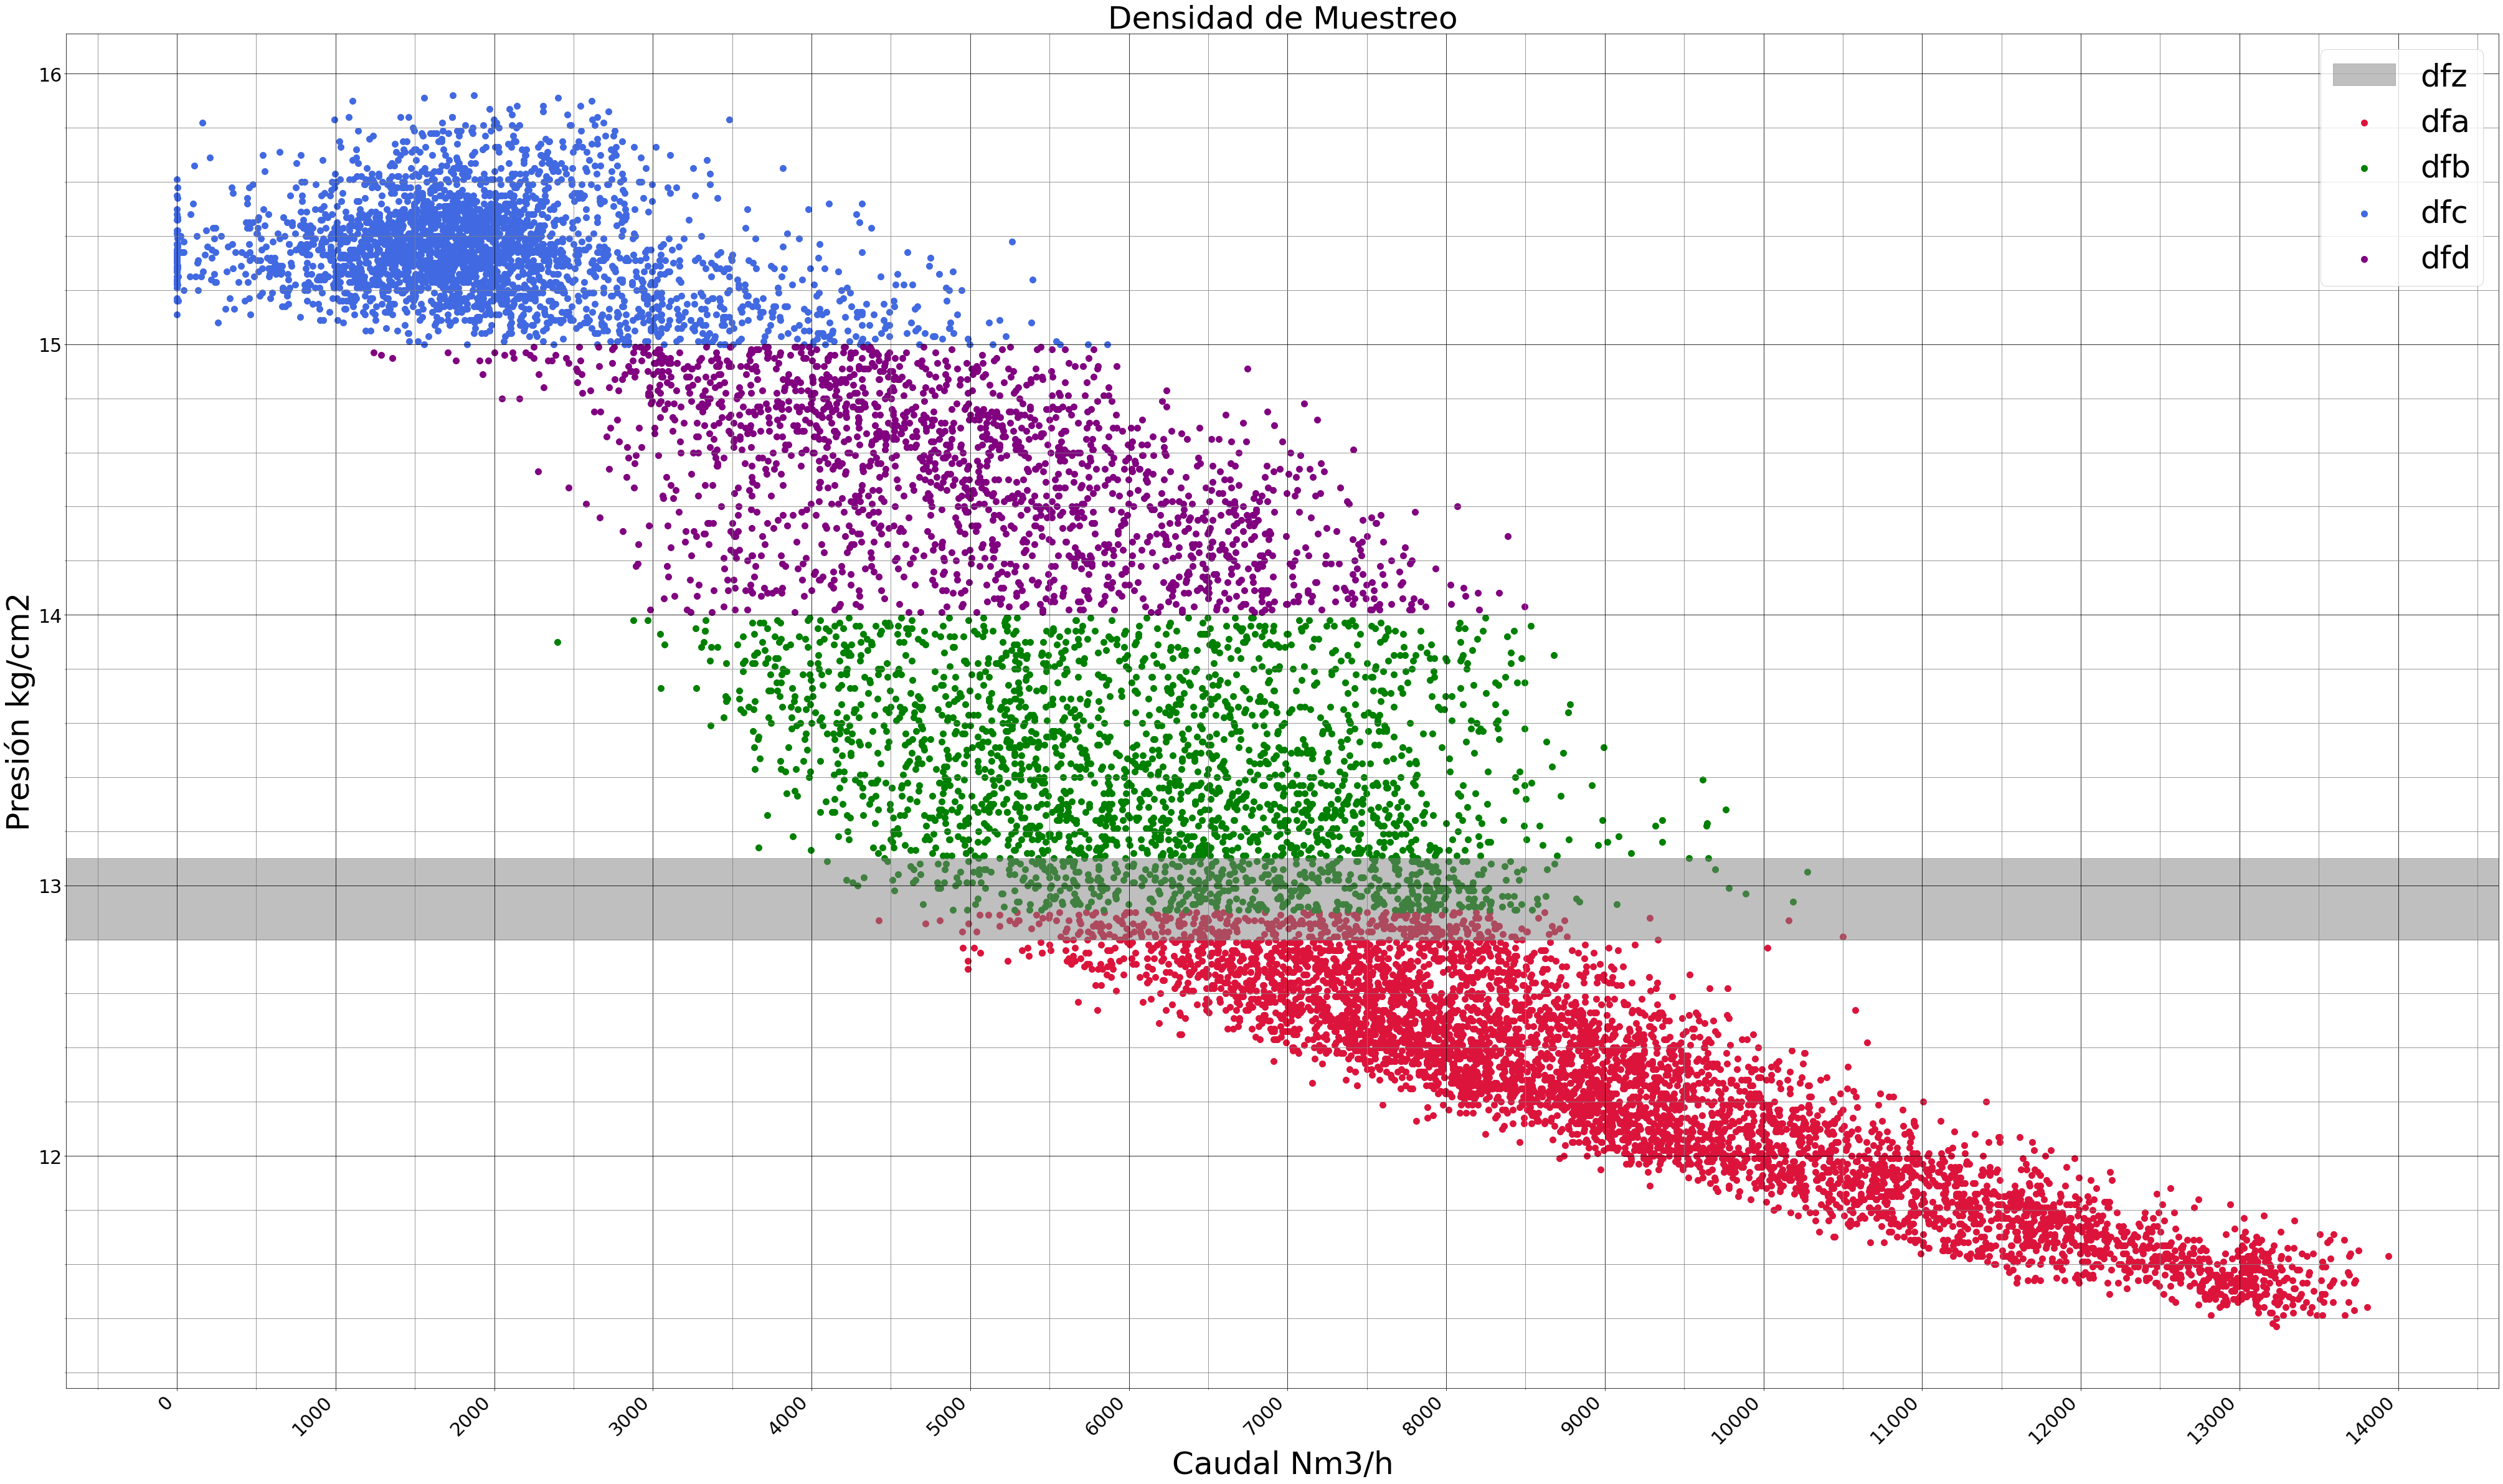

In [72]:
from pandas.core.aggregation import reconstruct_func
from io import DEFAULT_BUFFER_SIZE
#@title Densidad de muestra ( completa)

InstrumentoParametro = 'PIR161' #@param {type:"raw"}
x = 'FQI161' #@param {type:"raw"}
y = 'PIR161' #@param {type:"raw"}
text='Caudal Nm3/h'
text1='Presión kg/cm2'
choice=False
Secciones = "12.9;14;15" #@param {type:"string"}
zoom = True #@param {type:"boolean"}
Intervalo = "12.8;13.1" #@param {type:"string"}
labels=['dfa','dfb','dfc','dfd']
Rangos=np.array(np.mat(Secciones))
Rangos1=np.array(np.mat(Intervalo))

fig1, ax = plt.subplots(1, figsize=(70,40))

#--------Muestreo color------
dfa = dfx.loc[dfx.loc[:,InstrumentoParametro] <= Rangos[0][0]]
dfb1= dfx.loc[dfx.loc[:,InstrumentoParametro] < Rangos[1][0]]
dfb= dfb1.loc[dfb1.loc[:,InstrumentoParametro] > Rangos[0][0]]
dfc1= dfx.loc[dfx.loc[:,InstrumentoParametro] < Rangos[2][0]]
dfc= dfc1.loc[dfc1.loc[:,InstrumentoParametro] > Rangos[1][0]]
dfd= dfx.loc[dfx.loc[:,InstrumentoParametro] >= Rangos[2][0]]



ax.scatter(dfa[x],dfa[y],color='crimson',s=100,label=labels[0])
ax.scatter(dfb[x],dfb[y],color='green',s=100,label=labels[1])
ax.scatter(dfd[x],dfd[y],color='royalblue',s=100,label=labels[2])
ax.scatter(dfc[x],dfc[y],color='purple',s=100,label=labels[3])

#------- muetra zoom---------------
if zoom == True:
  dfz1= dfx.loc[dfx.loc[:,InstrumentoParametro] < Rangos1[1][0]]
  dfz= dfz1.loc[dfz1.loc[:,InstrumentoParametro] >= Rangos1[0][0]]
  ax.axhspan(Rangos1[0][0],Rangos1[1][0],color='grey',alpha=0.5,label='dfz')
    
labels = ax.get_xticklabels()
labels1= ax.get_yticklabels()
plt.setp(labels, rotation=45,fontsize=30, horizontalalignment='right')
plt.setp(labels1,fontsize=30, horizontalalignment='right')

ax.xaxis.set_major_locator(MultipleLocator(1000),)
ax.xaxis.set_minor_locator(MultipleLocator(500),)
ax.axes.grid(True, which='minor',color='grey',axis='both')
ax.axes.grid(True, which='major',color='black',axis='both')

ax.yaxis.set_minor_locator(MultipleLocator(0.2),)
ax.set_title('Densidad de Muestreo',fontsize=50)

if x== 'FQI161':
   ax.set_xlabel(text,fontsize=50)
   ax.set_ylabel(text1,fontsize=50)
 
else :
   ax.set_xlabel(text1,fontsize=50)
   ax.set_ylabel(text,fontsize=50)

ax.legend(fontsize=50)

plt.show()

Particion=[len(dfa.index),len(dfb.index),len(dfc.index),len(dfd.index)]
Auxiliar=[len(dfa.index),len(dfb.index),len(dfc.index),len(dfd.index)]

for i in range(0,4):
  Auxiliar[i]=round((Particion[i]*100)/len(dfx.index),1)

matriz=np.column_stack((np.array(Particion),np.array(Auxiliar)))

fig = go.Figure(data=[go.Table(
    header=dict(values=['dfa','dfb','dfc','dfd'],
                fill_color='paleturquoise',
                align='left'),
    cells=dict(values=matriz,
               fill_color='lavender',
               align='left'))

  ])
fig.show()

ax.autoscale_view()


In [73]:
#@title Maximos y minimos de intervalo dado:
nvalue = 110 #@param {type:"number"}
Instrumento = 'FQI161' #@param {type:"raw"}
dfx = dfz #@param {type:"raw"}
dfmax=dfx.nlargest(nvalue,Instrumento)
dfmin=dfx.nsmallest(nvalue,Instrumento)


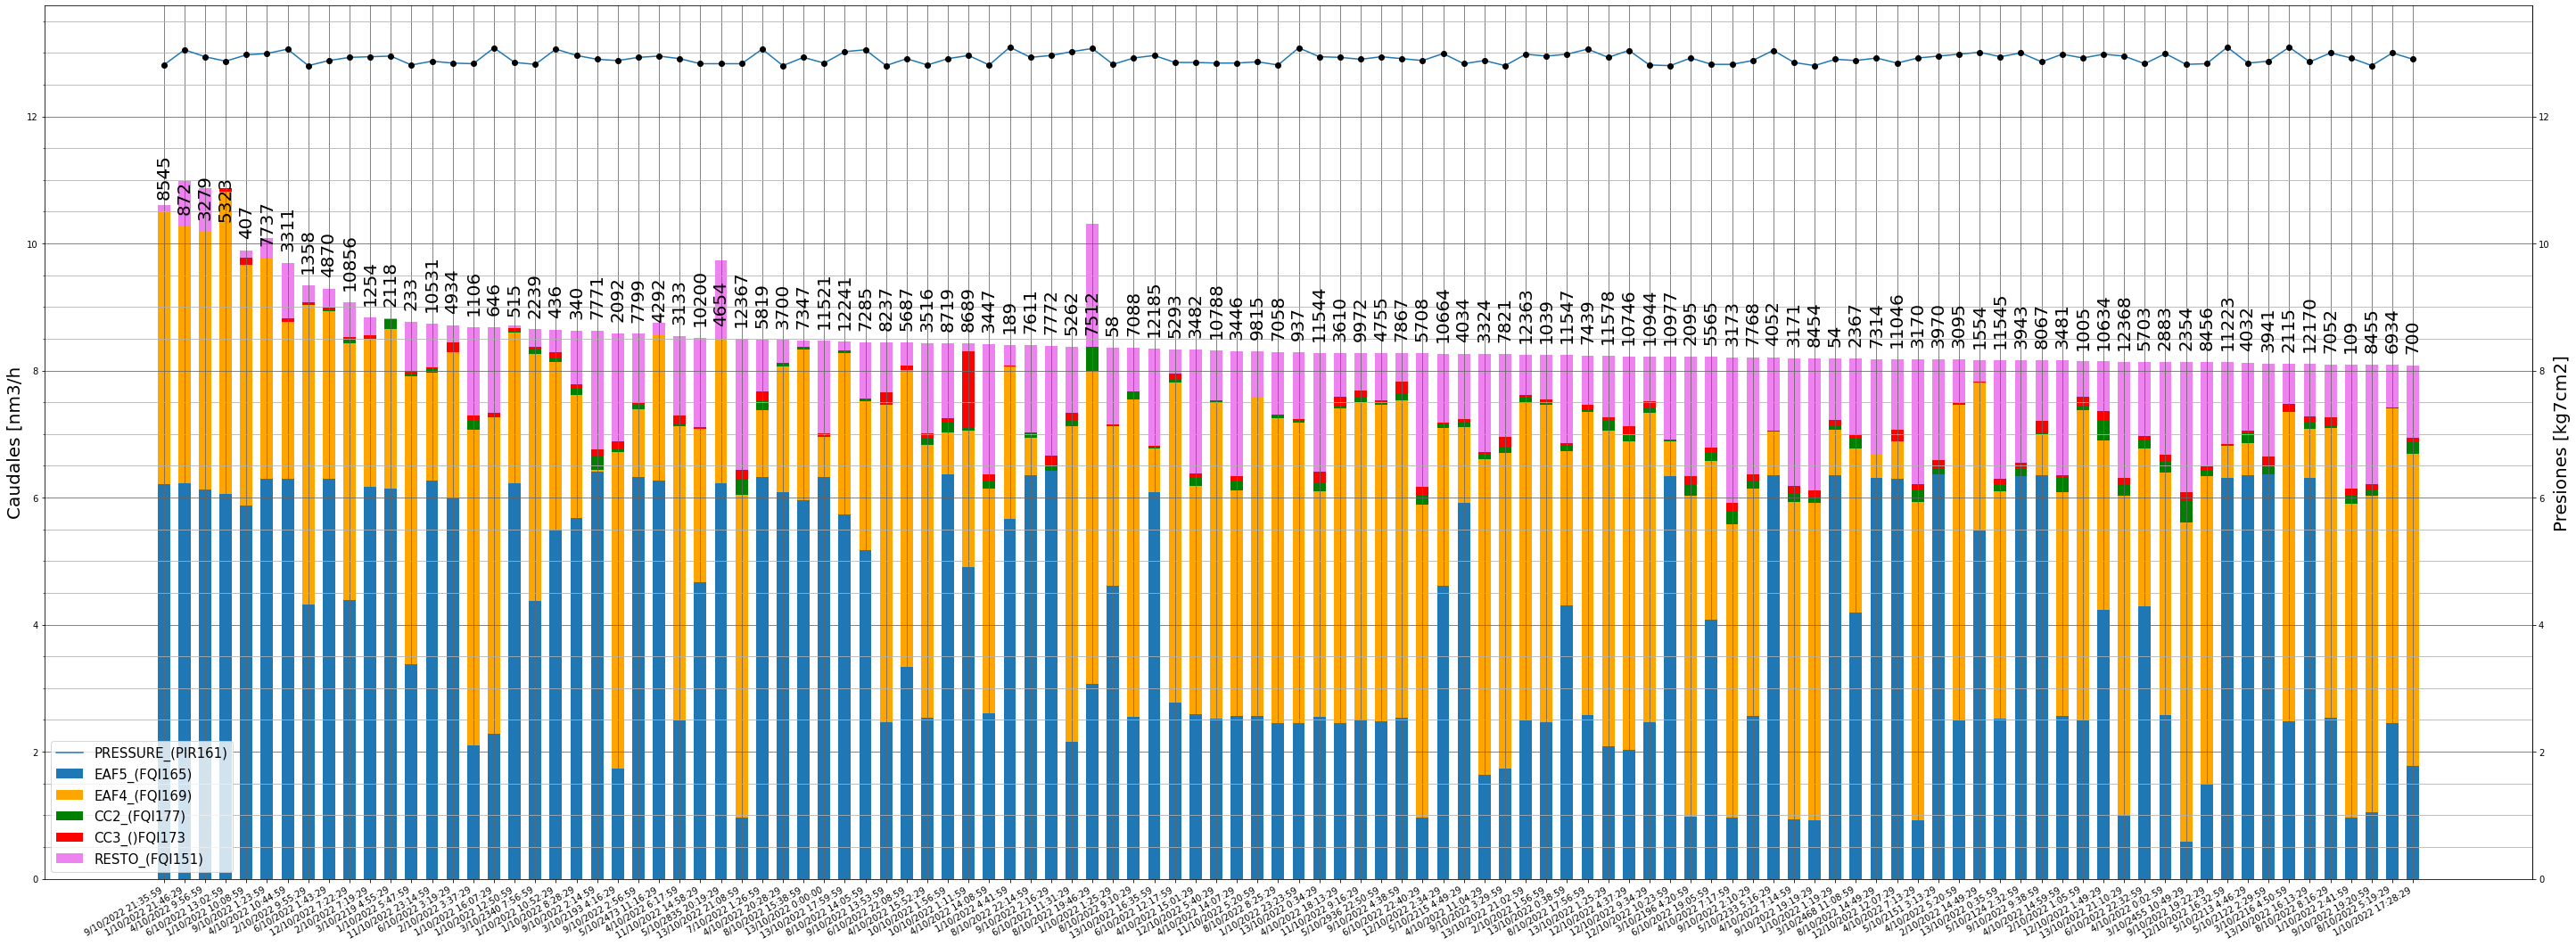

In [78]:
from pyparsing.helpers import string
#@title GRAFICA DE CONSUMOS EN CONDICIÓN DADA ( DISTRIBUCIÓN DE CAUDLES Y PRESIÓN)
Muestra = dfmax #@param {type:"raw"}
MU=str(Muestra)


# DEFINICION DE BARA EN COLORES------------------------------------
def GRAFICO_BARRA(B,l):
  fig3, (ax)= plt.subplots(1, figsize=(50,20))
  bar1=np.arange(len(B.Time))
  
  w=0.6
  AA=1
  z=len(B)
  IND=list((B.indice.values))
  x= list(B.Time.values)
  y= list((B.FQI161.values/1000)+0.25)
  #j= (df.loc[0]['Date']).replace('/','')
  #o='Barra_M'+l+j+".jpg"

  ax.bar(bar1,B.FQI165/1000,w,color="tab:blue",label="EAF5_(FQI165)")
  ax.bar(bar1,B.FQI169/1000,w,bottom=B.FQI165/1000,color="orange",label="EAF4_(FQI169)")
  ax.bar(bar1,B.FQI177/1000,w,bottom=(B.FQI165+B.FQI169)/1000,color="green",label="CC2_(FQI177)")
  ax.bar(bar1,B.FQI173/1000,w,bottom=(B.FQI165+B.FQI169+B.FQI177)/1000,color="red",label="CC3_()FQI173")
  ax.bar(bar1,B.FQI151/1000,w,bottom=(B.FQI165+B.FQI169+B.FQI177+B.FQI173)/1000,color="violet",alpha=AA,label="RESTO_(FQI151)")
  plt.xticks(bar1,B.Time)
  ax.plot(bar1,B.PIR161,label="PRESSURE_(PIR161)")
  r,=ax.plot(B.Time,B.PIR161,'o',color="black")
  ax.grid(visible=True,which='major',color='#666666',linestyle='-')
  ax.set_ylabel('Caudales [nm3/h',fontsize=20)
  secax_y=ax.secondary_yaxis("right",functions=None)
  secax_y.set_ylabel(r'Presiones [kg7cm2]',fontsize=20)

  for i in range(0,z):
     plt.text(x[i],y[i],str(IND[i]),fontsize=20,horizontalalignment='center',
              rotation='vertical')    
  ax.yaxis.grid(True, which='minor')
  ax.yaxis.set_minor_locator(MultipleLocator(0.5),)
  fig3.autofmt_xdate()
  ax.legend(fontsize=15)
  plt.show()

  #print(bar1)
#------------------------------------------------------------------------
GRAFICO_BARRA(Muestra,MU)

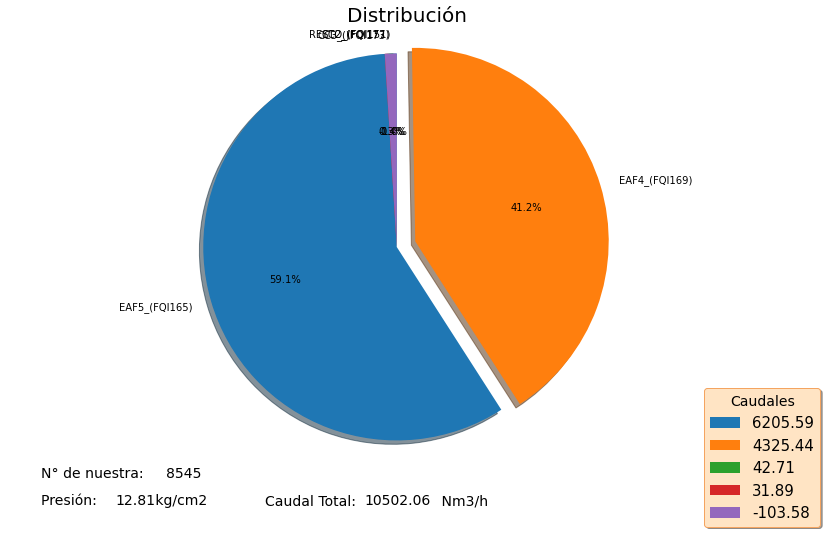

In [23]:
from collections.abc import ItemsView
#@title Distribución de la muestra individual. 
#@markdown Ingrese numero de nuestra a visualizar.
def PIE(c,T):
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
 labels = 'EAF5_(FQI165)', 'EAF4_(FQI169)', 'CC2_(FQI177)', 'CC3_()FQI173','RESTO_(FQI151)'
 x=(c-1)
 a= (df.loc[x]['FQI165'])*(100/(df.loc[x]['FQI161']))
 b= (df.loc[x]['FQI169'])*(100/(df.loc[x]['FQI161']))
 c= (df.loc[x]['FQI177'])*(100/(df.loc[x]['FQI161']))
 d= (df.loc[x]['FQI173'])*(100/(df.loc[x]['FQI161']))
 e= (df.loc[x]['FQI151'])*(100/(df.loc[x]['FQI161']))
 j= (df.loc[x]['Date']).replace('/','')
 y='Pie_M'+str(Item)+"_"+j+".jpg"
 sizes = [a,b,c,d,e]
 explode = (0, 0.1, 0, 0,0)  # only "explode" the 2nd slice (i.e. 'Hogs')
 fig4, ax4 = plt.subplots(figsize=(12,8))
 
 ax4.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
 ax4.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

 plt.title("Distribución",fontsize=20)

 fig4.legend([str(df.loc[x]['FQI165']),
              str(df.loc[x]['FQI169']),
              str(df.loc[x]['FQI177']),
              str(df.loc[x]['FQI173']),
              str(df.loc[x]['FQI151'])],
              loc='lower right',
              fontsize=15,
              shadow=True,
              facecolor="Bisque",
              edgecolor="SandyBrown",
              title="Caudales",
              title_fontsize=14
 )
 ax4.annotate('Presión:             kg/cm2',
            xy=(1, 1),  
            xytext=(0.05, 0.05),    # fraction, fraction
            textcoords='figure fraction',
            arrowprops=None,
            horizontalalignment='left',
            verticalalignment='bottom',
            fontsize=14)
 ax4.annotate(str(df.loc[x]['PIR161']),
            xy=(1, 1),  
            xytext=(0.14, 0.05),    # fraction, fraction
            textcoords='figure fraction',
            arrowprops=None,
            horizontalalignment='left',
            verticalalignment='bottom',
            fontsize=14)
 
 ax4.annotate('N° de nuestra: ',
            xy=(1, 1),  
            xytext=(0.05, 0.1),    # fraction, fraction
            textcoords='figure fraction',
            arrowprops=None,
            horizontalalignment='left',
            verticalalignment='bottom',
            fontsize=14) 
 
 ax4.annotate(str(x+1),
            xy=(1, 1),  
            xytext=(0.2, 0.1),    # fraction, fraction
            textcoords='figure fraction',
            arrowprops=None,
            horizontalalignment='left',
            verticalalignment='bottom',
            fontsize=14)
 
 ax4.annotate('Caudal Total:                   Nm3/h',
            xy=(1, 1),  
            xytext=(0.32, 0.05),    # fraction, fraction
            textcoords='figure fraction',
            arrowprops=None,
            horizontalalignment='left',
            verticalalignment='bottom',
            fontsize=14)
 ax4.annotate(str(df.loc[x]['FQI161']),
            xy=(1, 1),  
            xytext=(0.44, 0.05),    # fraction, fraction
            textcoords='figure fraction',
            arrowprops=None,
            horizontalalignment='left',
            verticalalignment='bottom',
            fontsize=14)
 if Exp==1:
   fig4.savefig(y)
 plt.show() 


#####################################################

Item = 8545 #@param {type:"number"}
Exp = False #@param {type:"boolean"}


PIE(Item,Muestra)

